In [1]:
# Install the necessary libraries for quantum machine learning
!pip install qiskit qiskit-machine-learning scikit-learn matplotlib

In [1]:
# Importing all the machine learning libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
# Loading the famous Iris Dataset

iris_data = datasets.load_iris()
X = iris_data.data # features (measurements) of the flowers
y = iris_data.target # labels (types) of the flowers

In [3]:
# Scaling the features to be between 0 and 1. This is often necessary for machine learning algorithms, especially quantum ones, as they work better with data in a specific range.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Splitting the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.8, random_state=42)

#Custom Quantum Kernel

In [5]:
# Importing necessary libraries for creating a custom quantum feature map.

from qiskit import QuantumCircuit                                       # To build quantum circuits
from qiskit.circuit import ParameterVector                              # To use parameters in the quantum circuit that can be varied
from qiskit_machine_learning.kernels import FidelityStatevectorKernel   # To create a quantum kernel from our custom circuit
from qiskit_machine_learning.algorithms.classifiers import QSVC

In [6]:
# Defining a function to create a custom quantum feature map.
# This is an alternative way to encode our classical data into a quantum state.
# This specific circuit uses RY gates and CZ gates.

def custom_feature_map(num_features: int) -> QuantumCircuit:
  # Create a vector of parameters, one for each feature
  params = ParameterVector('x',length=num_features)
  # Create a quantum circuit with the specified number of features (qubits)
  qc = QuantumCircuit(num_features)

  # Apply RY gates to each qubit, with the rotation angle controlled by the input features
  for i in range(num_features):
    qc.ry(params[i],i)

  # Apply controlled-Z (CZ) gates between adjacent qubits to create entanglement
  # Entanglement is a key quantum resource that can help in classification
  for i in range(num_features-1):
    qc.cz(i, i+1)

  # Return the created quantum circuit
  return qc

In [7]:
# Creating an instance of our custom feature map and a quantum kernel from it.

num_features=4 # We are working with 4 features
custom_map = custom_feature_map(num_features) # Create the custom feature map circuit
custom_kernel = FidelityStatevectorKernel(feature_map=custom_map) # Create a quantum kernel using our custom map

In [8]:
# Creating and training a QSVC model using our custom quantum kernel.
qsvc_custom = QSVC(quantum_kernel=custom_kernel) # Initialize QSVC with the custom kernel
qsvc_custom.fit(X_train,y_train) # Train the model with the custom kernel

# Making predictions and calculating the accuracy using the custom kernel.
y_pred_custom = qsvc_custom.predict(X_test)
accuracy_score(y_test,y_pred_custom)
print("Accuracy using Custom Kernel:", accuracy_score(y_test, y_pred_custom))

Accuracy using Custom Kernel: 0.875


In [9]:
# Training a classical Support Vector Classifier (SVC) with a Radial Basis Function (RBF) kernel for comparison.
# This shows how a standard, non-quantum machine learning model performs on the same task.
from sklearn.svm import SVC

 # Train the classical SVC and make predictions
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_classical = clf.predict(X_test)
print("Classical SVM Accuracy:", accuracy_score(y_test, y_pred_classical))
# Output => Classical SVM Accuracy: 0.9583333333333334

Classical SVM Accuracy: 0.9583333333333334


#Using pre-built Quantum Kernel

In [10]:
# Importing necessary components from Qiskit for quantum machine learning.

from qiskit.circuit.library import ZZFeatureMap                           # A predefined quantum circuit to encode classical data
from qiskit_machine_learning.kernels import FidelityStatevectorKernel     # A way to measure similarity between data points in a quantum space
from qiskit_machine_learning.algorithms.classifiers import QSVC           # The Quantum Support Vector Classifier algorithm

In [11]:
# Creating a ZZFeatureMap quantum circuit.
# This circuit takes our classical data (the scaled features) and encodes it into a quantum state.
# This is the first step in using quantum computers for machine learning.

feature_map = ZZFeatureMap(feature_dimension=4, reps=3, entanglement='full') # Define the feature map with 2 features, 2 layers, and full entanglement

In [12]:
# Creating a Quantum Kernel using the ZZFeatureMap.
# The quantum kernel calculates the similarity between two quantum states that represent our data points.
# This similarity measure is used by the quantum classifier.

quantum_kernel = FidelityStatevectorKernel(feature_map=feature_map)

In [13]:
# Creating a Quantum Support Vector Classifier (QSVC).
# This is a quantum version of a popular machine learning algorithm called Support Vector Machine (SVM).
# It uses the quantum kernel to perform classification.

qsvc_pre_built = QSVC(quantum_kernel=quantum_kernel)

In [15]:
# Training the Quantum Support Vector Classifier on the training data.
# The QSVC learns to classify the data points based on the similarities calculated by the quantum kernel.
qsvc_pre_built.fit(X_train,y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_statevector_kernel.FidelityStatevectorKernel object at 0x79af11144fd0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [16]:
# Making predictions on the test data using the trained QSVC model.
# We use the test data to evaluate how well our model performs on new, unseen data.
y_pred = qsvc_pre_built.predict(X_test) # Make predictions

# Calculating the accuracy of the model.
# Accuracy is the percentage of correctly predicted data points.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6416666666666667


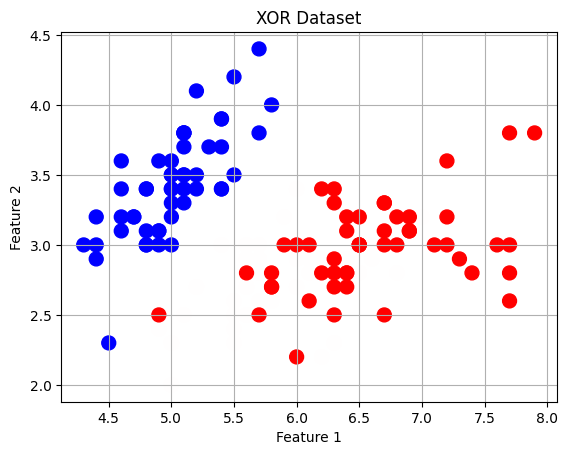

In [17]:
# Visualizing the original data points.
# We plot the data points in 2D space, colored by their actual class (0 or 1).
# This helps us understand the data distribution.
import matplotlib.pyplot as plt # Import matplotlib again for plotting

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100) # Create a scatter plot
plt.title("XOR Dataset") # Add a title
plt.xlabel("Feature 1") # Label the x-axis
plt.ylabel("Feature 2") # Label the y-axis
plt.grid(True) # Add a grid
plt.show() # Display the plot

#Exporting the model

From the above code, we can infer that,
- Accuracy using Custom Quantum Kernel = 87.5%
- Accuracy using Pre-Built Quantum Kernel = 71.66%

Since, the accuracy is high when we use custom quantum kernel, hence, we will download the qsvc_custom model as pickle file.

In [20]:
import joblib

joblib.dump(qsvc_custom, "qsvc_custom.pkl")      # Save your trained quantum model
joblib.dump(scaler, "scaler.pkl")         # Save the MinMaxScaler used to normalize inputs

['scaler.pkl']